# APA a.a. 22/23 - Accordo Bizantino Monte Carlo

Lontani dal caso peggiore: Accordo Bizantino Monte Carlo (Compito 7.1 delle note)<br>
![alt text](7.1.png "Accordo Bizantino Monte Carlo")

## Librerie Necessarie

In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



## Implementazione Algoritmo

Importo le librerie necessarie. <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Funzioni di Supporto

#### majorityValueCounter
Funzione per il calcolo del numero di 1 e 0 in un vettore. <br>
Sommo gli elementi del vettore (il numero delle ripetizioni di 1 è uguale alla somma degli 1). <br>
Sottraggo il risultato alla lunghezza del vettore (Lunghezza - Somma degli 1 = Numero di 0). <br>
In questo modo ottengo il numero di 1 e 0. <br>
Ritorno il numero di 1 e 0. <br>

Parametri: vettore di interi (0 e 1)
Return: numero di 1 e 0

Esempio: majorityValueCounter([0, 1, 1, 0, 1]) -> 3, 2
         majorityValueCounter([0, 0, 0, 0, 0]) -> 0, 5


In [3]:
def majorityValueCounter(generalList):
    # Contatore per il numero di 1 e 0
    one = np.sum(generalList) # Somma degli elementi del vettore
    zero = len(generalList) - one
    
    return one, zero

## Esecuzione Algoritmo

Inizializzo le variabili necessarie. <br>

In [4]:
# Numero di Running
numberRunning = 2**10

# Numero di Generali
numberGeneral = 4

# Numero di traditori
numberTraitor = 1

# Vettore dei round
roundNumber = np.zeros(numberRunning)


### Algoritmo

In [5]:
for run in range(numberRunning):
    # Numero di round per trovare l'accordo
    messageRound = 0

    # Vettore scelte iniziali
    initialChoice = np.array([0, 0, 1, 1])

    while True:
        # Moneta globale 
        coin = np.random.randint(0, 2)

        # Vettore majority: valore maggioritario tra i messaggi ricevuti
        majorityValue = np.zeros(numberGeneral - numberTraitor)

        # Vettore tally: valori uguali a majorityValue
        tallyValue = np.zeros(numberGeneral - numberTraitor)

        # Trasmissione e Ricezione messaggi
        for i in range(numberGeneral - numberTraitor):
            generalChoices = np.copy(initialChoice)
            generalChoices[i] = 1 - generalChoices[i]  # Generale Traditore inverte il bit

            counterOne, counterZero = majorityValueCounter(generalChoices)
            if counterOne > counterZero:
                majorityValue[i] = 1
            else:
                majorityValue[i] = 0

            for j in range(numberGeneral):
                if generalChoices[j] == majorityValue[i]:
                    tallyValue[i] += 1

        # Se tally >= 2*t+1, il generale i si adegua alla maggioranza e la scelta diventa uguale ai valori in majorityValue.
        # Nel caso fosse già uguale ad esso non varia.
        # Se tally < 2*t+1, il generale 'guarda' la moneta globale 
        # e sceglie '1' o '0' in base ad essa con probabilità pari a '1/2'.
        for i in range(numberGeneral - numberTraitor):
            if tallyValue[i] >= (2 * numberTraitor + 1):
                initialChoice[i] = majorityValue[i]
            else:
                if coin == 1:
                    initialChoice[i] = 1
                else:
                    initialChoice[i] = 0

        # Incremento del numero di round
        messageRound += 1

        # Controllo se i generali hanno scelto tutti lo stesso valore
        if np.all(initialChoice[:-1] == initialChoice[0]):
            break

    # Verifica della condizione per il round successivo
    if messageRound < numberRunning:
         if np.all(tallyValue >= (2 * numberTraitor + 1)) and coin == np.argmax(np.bincount(majorityValue.astype(int))):
            messageRound += 1

    roundNumber[run] = messageRound

### Calcolo la frazione di run in cui l'accordo è raggiunto per ogni numero di round

In [6]:
fractions = np.zeros(10)
for r in range(1, 11):
    fractions[r-1] = np.sum(roundNumber == r) / numberRunning

### Grafico la frazione dei run in cui l'accordo è raggiunto in r = 1, 2, ..., 10 round

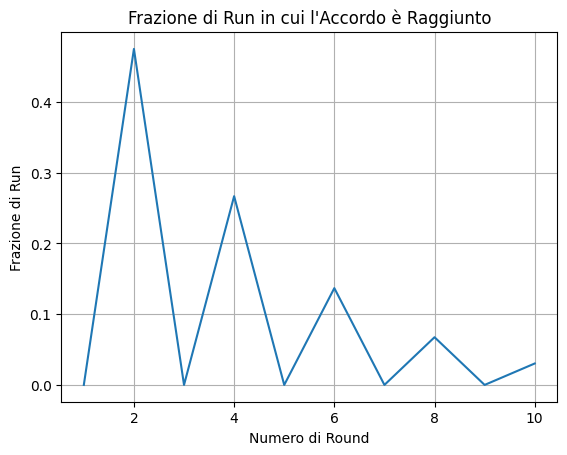

In [7]:
plt.plot(np.arange(1, 11), fractions)
plt.xlabel('Numero di Round')
plt.ylabel('Frazione di Run')
plt.title('Frazione di Run in cui l\'Accordo è Raggiunto')
plt.grid(True)
plt.show()

### Grafico della distribuzione dei valori per round

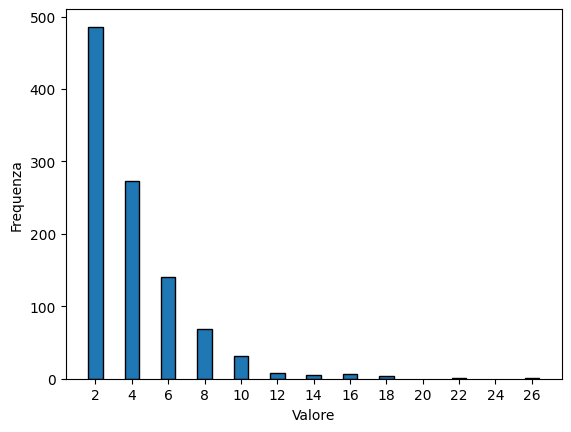

In [8]:
unique_values, frequencies = np.unique(roundNumber, return_counts=True)

# Calcola i valori centrali dei rettangoli
x = unique_values

# Crea l'istogramma con i rettangoli centrati
plt.bar(x, frequencies, align='center', edgecolor='black')

# Imposta i titoli degli assi
plt.xlabel('Valore')
plt.ylabel('Frequenza')

plt.xticks(np.arange(min(x), max(x)+1, 2))

# Mostra l'istogramma
plt.show()

### Media e Varianza

In [9]:
# Calcolo media dei round per raggiungere l'accordo tra i generali
media = np.mean(roundNumber)
# Calcolo varianza dei round per raggiungere l'accordo tra i generali
varianza = np.var(roundNumber)

print("Numero di round: ", roundNumber)
print("Media: ", media)
print("Varianza: ", varianza)

Numero di round:  [2. 2. 4. ... 6. 4. 2.]
Media:  4.05078125
Varianza:  7.9974212646484375


## Conclusioni

Eseguendo l'algoritmo più volte otteniamo sempre risultati simili ma non de tutto uguali, da tali risultati possiamo trarre alcune conclusioni generali per l'algoritmo preso in esame. <br>

La media dei tentativi necessari per trovare l'accordo, nelle esecuzioni provate, si attesta in generale sempre in un intorno di 4. 
Questo ci indica che in generale, il numero di tentativi necessari si avvicina a 4, anche se ci sono molti round in cui l'accordo viene raggiunto con soli 2 tentativi. Da notarsi inoltre che i casi in cui il numero di tentati è maggiore a 10 e relativamente basso. <br>

La varianza, invece, si attesta in un intorno di 7, questo indica che i valori sono abbastanza dispersi intorno alla media descritta prima. Infatti, ci sono round in cui l'accordo viene trovato rapidamente con un numero di tentativi molto basso, altri in cui è richiesto un numero significativamente maggiore di tentativi. <br>

In generale, possiamo dire che l'algoritmo è abbastanza efficiente, in quanto, in media, l'accordo viene trovato in un numero di tentativi basso, anche se ci sono casi in cui il numero di tentativi è molto alto. <br>